In [138]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/MicrosoftLearning/mslearn-dp100/main/data/diabetes.csv")

In [139]:
dataset.shape

(10049, 10)

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10049 non-null  int64  
 1   Pregnancies             10049 non-null  int64  
 2   PlasmaGlucose           10049 non-null  int64  
 3   DiastolicBloodPressure  10049 non-null  int64  
 4   TricepsThickness        10049 non-null  int64  
 5   SerumInsulin            10049 non-null  int64  
 6   BMI                     10049 non-null  float64
 7   DiabetesPedigree        10046 non-null  float64
 8   Age                     10042 non-null  float64
 9   Diabetic                10049 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 785.2 KB


In [141]:
dataset.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.004900e+04,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10046.000000,10042.000000,10049.000000
mean,1.502282e+06,3.254553,107.931934,71.195144,28.811325,139.198726,31.567130,0.400813,30.143199,0.334362
std,2.890477e+05,3.405031,32.847798,16.815581,14.502575,133.646681,9.802690,0.381916,12.105008,0.471790
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.252296e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.250908,0.136954,22.000000,0.000000
50%,1.504516e+06,2.000000,104.000000,72.000000,31.000000,84.000000,31.918049,0.199656,24.000000,0.000000
75%,1.754457e+06,6.000000,129.000000,85.000000,41.000000,197.000000,39.336129,0.620545,35.000000,1.000000
max,1.999997e+06,14.000000,766.000000,117.000000,92.000000,796.000000,56.034628,2.301594,77.000000,1.000000


In [142]:
dataset.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          3
Age                       7
Diabetic                  0
dtype: int64

In [143]:
dataset["Age"] = dataset["Age"].fillna(30)

In [144]:
dataset.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          3
Age                       0
Diabetic                  0
dtype: int64

In [145]:
len(dataset[dataset.duplicated(['PatientID'])])

90

In [146]:
dataset = dataset.drop_duplicates(subset=['PatientID'], keep='first')

In [122]:
dataset = dataset.drop_duplicates() # if row have all columns na 

In [147]:
len(dataset)

9959

In [124]:
import matplotlib.pyplot as plt

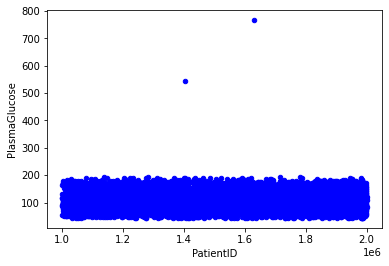

In [148]:
ax = plt.gca()

dataset.plot(kind='scatter',x='PatientID',y='PlasmaGlucose',ax=ax, color='blue')
#dataset.plot(kind='scatter',x='PatientID',y='TricepsThickness', color='red', ax=ax)

plt.show()

In [149]:
dataset = dataset.drop(dataset[dataset["PlasmaGlucose"]>400].index)

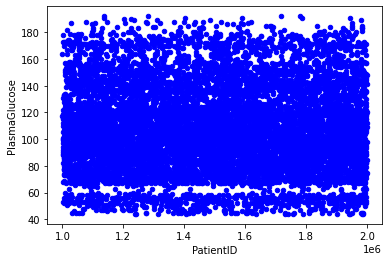

In [150]:
ax = plt.gca()

dataset.plot(kind='scatter',x='PatientID',y='PlasmaGlucose',ax=ax, color='blue')
#dataset.plot(kind='scatter',x='PatientID',y='TricepsThickness', color='red', ax=ax)

plt.show()

In [151]:
import numpy as np
dataset["PlasmaGlucose"] = np.log2(dataset["PlasmaGlucose"])

In [133]:
dataset

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,7.417853,80,34,23,43.509726,NaN,21.0,0
1,1147438,8,6.523562,93,47,36,21.240576,NaN,23.0,0
2,1640031,7,6.845490,47,52,35,41.511523,0.079019,23.0,0
3,1883350,9,6.686501,78,25,304,29.582192,1.282870,43.0,1
4,1424119,1,6.409391,59,27,35,42.604536,NaN,22.0,0
...,...,...,...,...,...,...,...,...,...,...
10044,1424119,1,6.409391,59,27,35,42.604536,0.549542,22.0,0
10045,1619297,0,6.357552,92,9,253,19.724160,0.103424,26.0,0
10046,1660149,0,7.055282,47,19,227,21.941357,0.174160,21.0,0
10047,1458769,0,6.066089,87,43,36,18.277723,0.236165,26.0,0


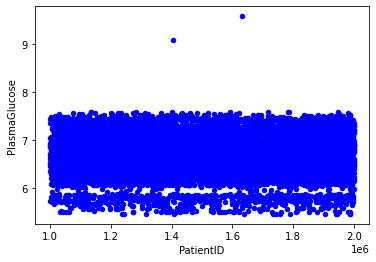

In [152]:
from pathlib import Path  
filepath = Path('Datasets/cleaned.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dataset.to_csv(filepath)  